In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

# Lista dei ticker delle banche italiane
tickers = {
    'Unicredit': 'UCG.MI',
    'Intesa Sanpaolo': 'ISP.MI',
    'Banco BPM': 'BAMI.MI',
    'BPER Banca': 'BPE.MI',
    'Mediobanca': 'MB.MI',
    'FinecoBank': 'FBK.MI'
}

# Dizionario per salvare i dati
price_data = {}
log_returns = pd.DataFrame()

# Estrazione e calcolo rendimenti logaritmici
for name, ticker in tickers.items():
    print(f"Scaricando dati per {name} ({ticker})...")
    data = yf.Ticker(ticker).history(period="max")
    data = data[['Close']].dropna()
    data.rename(columns={'Close': name}, inplace=True)
    price_data[name] = data

    # Calcolo dei log-return
    log_return = np.log(data[name] / data[name].shift(1))
    log_returns[name] = log_return

# Allineamento delle date (intersezione)
log_returns.dropna(inplace=True)

# Output di controllo
print("\n✅ Log-return calcolati:")
print(log_returns.tail())

# Se vuoi anche i prezzi:
price_df = pd.concat(price_data.values(), axis=1, join='inner')
price_df.columns = price_data.keys()

print("\n✅ Prezzi allineati:")
print(price_df.tail())

Scaricando dati per Unicredit (UCG.MI)...


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Scaricando dati per Intesa Sanpaolo (ISP.MI)...
Scaricando dati per Banco BPM (BAMI.MI)...
Scaricando dati per BPER Banca (BPE.MI)...
Scaricando dati per Mediobanca (MB.MI)...


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Scaricando dati per FinecoBank (FBK.MI)...

✅ Log-return calcolati:
                           Unicredit  Intesa Sanpaolo  Banco BPM  BPER Banca  \
Date                                                                           
2026-01-09 00:00:00+01:00  -0.000424        -0.002695  -0.006299   -0.007044   
2026-01-12 00:00:00+01:00   0.006344         0.010403   0.019555   -0.001248   
2026-01-13 00:00:00+01:00   0.004067        -0.000167  -0.003881    0.003740   
2026-01-14 00:00:00+01:00  -0.000700        -0.002842  -0.025597    0.000415   
2026-01-15 00:00:00+01:00   0.013356         0.005177   0.021311    0.007846   

                           Mediobanca  FinecoBank  
Date                                               
2026-01-09 00:00:00+01:00    0.006646    0.002220  
2026-01-12 00:00:00+01:00    0.002481    0.001330  
2026-01-13 00:00:00+01:00   -0.004968   -0.002217  
2026-01-14 00:00:00+01:00   -0.001384   -0.004448  
2026-01-15 00:00:00+01:00   -0.014232    0.004004  

✅ Prez

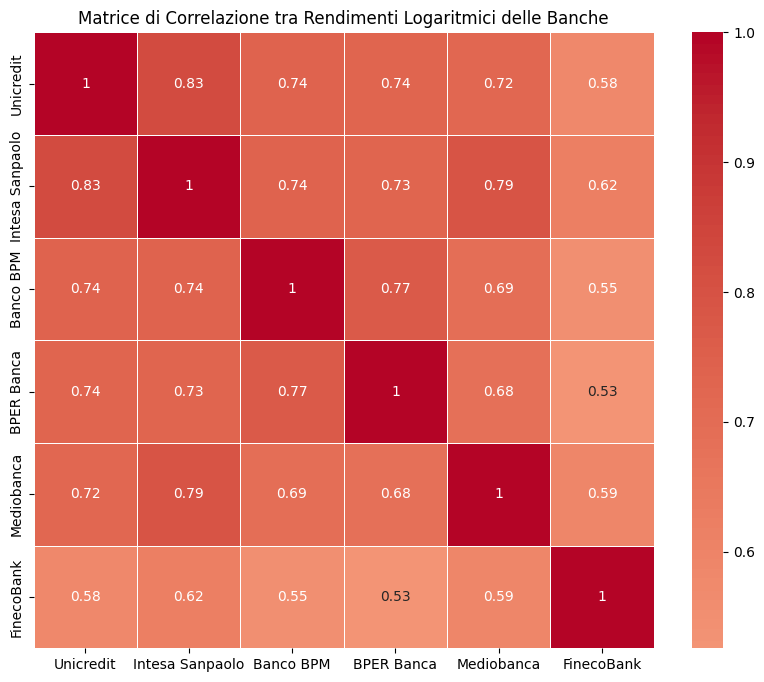

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcolo della matrice di correlazione
corr_matrix = log_returns.corr()

# Visualizzazione con heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Matrice di Correlazione tra Rendimenti Logaritmici delle Banche")
plt.show()

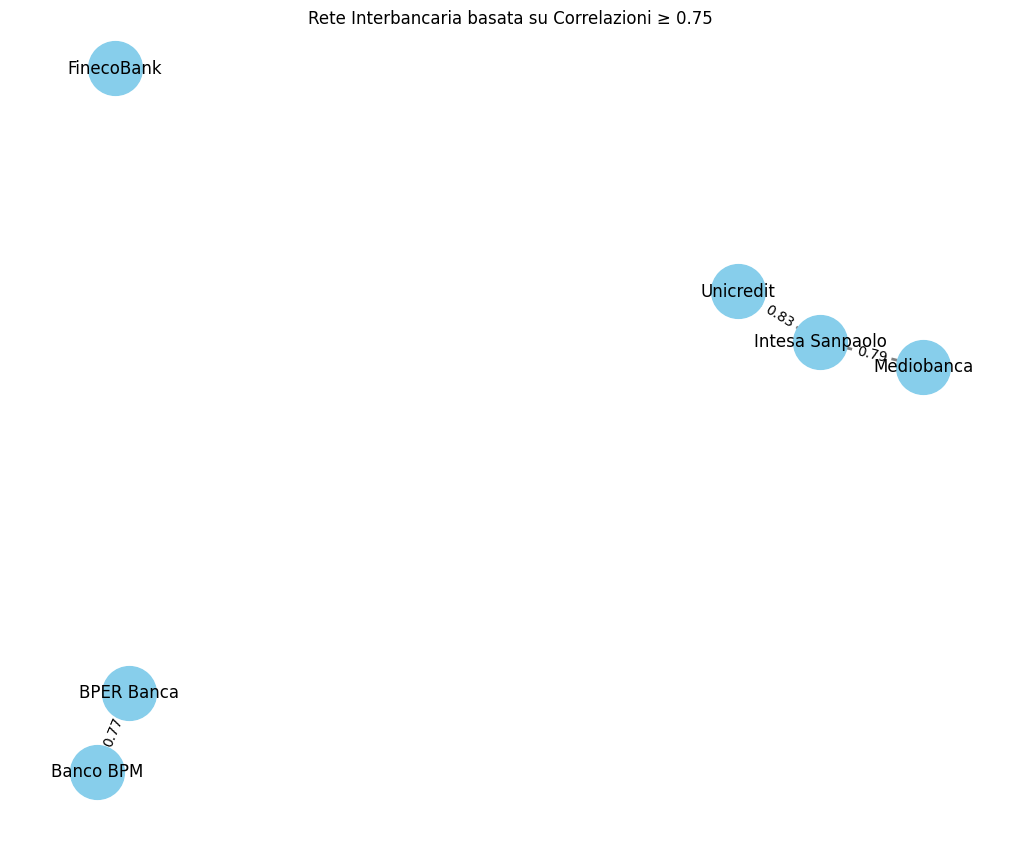

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Soglia minima per creare un link (si può modificare per esplorare la rete)
threshold = 0.75

# Inizializza il grafo
G = nx.Graph()

# Aggiunge i nodi (banche)
for bank in corr_matrix.columns:
    G.add_node(bank)

# Aggiunge gli archi basati sulla correlazione
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and corr_matrix.loc[i, j] >= threshold:
            G.add_edge(i, j, weight=round(corr_matrix.loc[i, j], 2))

# Layout per il grafo
pos = nx.spring_layout(G, seed=42)

# Disegno del grafo
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='grey', node_size=1500, font_size=12, width=2)

# Disegna le etichette dei pesi (correlazioni)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Rete Interbancaria basata su Correlazioni ≥ 0.75")
plt.axis('off')
plt.show()

In [5]:
# Calcolo delle misure di centralità
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, weight='weight', normalized=True)
eigenvector_centrality = nx.eigenvector_centrality(G, weight='weight', max_iter=1000)

# Mettiamo tutto in un DataFrame per comparazione
import pandas as pd

centrality_df = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Eigenvector Centrality': eigenvector_centrality
})

# Ordina per importanza sistemica (es. eigenvector)
centrality_df = centrality_df.sort_values(by='Eigenvector Centrality', ascending=False)
print("\n🔍 Classifica Centralità Sistemica:")
print(centrality_df.round(3))


🔍 Classifica Centralità Sistemica:
                 Degree Centrality  Betweenness Centrality  \
Intesa Sanpaolo                0.4                     0.1   
Unicredit                      0.2                     0.0   
Mediobanca                     0.2                     0.0   
Banco BPM                      0.2                     0.0   
BPER Banca                     0.2                     0.0   
FinecoBank                     0.0                     0.0   

                 Eigenvector Centrality  
Intesa Sanpaolo                   0.707  
Unicredit                         0.512  
Mediobanca                        0.488  
Banco BPM                         0.000  
BPER Banca                        0.000  
FinecoBank                        0.000  


In [6]:
import networkx as nx

# Matrice di correlazione già esistente
# log_returns → già calcolato
corr_matrix = log_returns.corr()

# COSTRUZIONE DEL GRAFO a soglia 0.75
threshold = 0.75
G_075 = nx.Graph()

# Aggiunge i nodi
for bank in corr_matrix.columns:
    G_075.add_node(bank)

# Aggiunge gli archi con correlazione >= soglia (escludendo diagonale)
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and corr_matrix.loc[i, j] >= threshold:
            G_075.add_edge(i, j, weight=round(corr_matrix.loc[i, j], 2))

# ✅ La rete G_075 ora è definita

# SIMULAZIONE: Fallimento di una banca (es. Intesa Sanpaolo)
G_sim = G_075.copy()
bank_to_fail = "Intesa Sanpaolo"
G_sim.remove_node(bank_to_fail)

# Numero di componenti connesse
num_components = nx.number_connected_components(G_sim)
components = list(nx.connected_components(G_sim))
isolated = [c for c in components if len(c) == 1]

# OUTPUT
print(f"\n📉 Simulazione: fallimento di '{bank_to_fail}'")
print(f"🔗 Numero di componenti connesse: {num_components}")
print(f"🧩 Componenti: {components}")
print(f"🧍 Nodi isolati dopo la rimozione: {[list(x)[0] for x in isolated]}")


📉 Simulazione: fallimento di 'Intesa Sanpaolo'
🔗 Numero di componenti connesse: 4
🧩 Componenti: [{'Unicredit'}, {'BPER Banca', 'Banco BPM'}, {'Mediobanca'}, {'FinecoBank'}]
🧍 Nodi isolati dopo la rimozione: ['Unicredit', 'Mediobanca', 'FinecoBank']


In [7]:
# --- Simulazione fallimento Unicredit ---
G_sim_ucg = G_075.copy()
bank_ucg = "Unicredit"
G_sim_ucg.remove_node(bank_ucg)

components_ucg = list(nx.connected_components(G_sim_ucg))
isolated_ucg = [c for c in components_ucg if len(c) == 1]

print(f"\n📉 Simulazione: fallimento di '{bank_ucg}'")
print(f"🔗 Numero componenti: {nx.number_connected_components(G_sim_ucg)}")
print(f"🧩 Componenti: {components_ucg}")
print(f"🧍 Nodi isolati: {[list(x)[0] for x in isolated_ucg]}")


📉 Simulazione: fallimento di 'Unicredit'
🔗 Numero componenti: 3
🧩 Componenti: [{'Mediobanca', 'Intesa Sanpaolo'}, {'BPER Banca', 'Banco BPM'}, {'FinecoBank'}]
🧍 Nodi isolati: ['FinecoBank']


In [8]:
# --- Simulazione fallimento Banco BPM ---
G_sim_bpm = G_075.copy()
bank_bpm = "Banco BPM"
G_sim_bpm.remove_node(bank_bpm)

components_bpm = list(nx.connected_components(G_sim_bpm))
isolated_bpm = [c for c in components_bpm if len(c) == 1]

print(f"\n📉 Simulazione: fallimento di '{bank_bpm}'")
print(f"🔗 Numero componenti: {nx.number_connected_components(G_sim_bpm)}")
print(f"🧩 Componenti: {components_bpm}")
print(f"🧍 Nodi isolati: {[list(x)[0] for x in isolated_bpm]}")


📉 Simulazione: fallimento di 'Banco BPM'
🔗 Numero componenti: 3
🧩 Componenti: [{'Unicredit', 'Mediobanca', 'Intesa Sanpaolo'}, {'BPER Banca'}, {'FinecoBank'}]
🧍 Nodi isolati: ['BPER Banca', 'FinecoBank']


In [9]:
# Definisci le due banche
target = 'Unicredit'
conditioning = 'Intesa Sanpaolo'

# Dataset con solo le due colonne
df_cov = log_returns[[target, conditioning]].dropna()
df_cov.columns = ['Y', 'X']  # Per chiarezza nella formula

# Quantile di stress
tau = 0.05

# VaR al 5% di X (banca condizionante)
VaR_X = df_cov['X'].quantile(tau)
print(f"📉 VaR_{tau*100:.0f}% di {conditioning}: {VaR_X:.4f}")

📉 VaR_5% di Intesa Sanpaolo: -0.0299


In [10]:
import statsmodels.formula.api as smf

# Regressione quantile
model = smf.quantreg('Y ~ X', data=df_cov)
res = model.fit(q=tau)

# Parametri stimati
print("\n📊 Coefficienti della quantile regression:")
print(res.params)


📊 Coefficienti della quantile regression:
Intercept   -0.021952
X            1.040447
dtype: float64


In [11]:
beta_0 = res.params['Intercept']
beta_1 = res.params['X']
CoVaR = beta_0 + beta_1 * VaR_X

print(f"\n🔻 CoVaR_{tau*100:.0f}% di {target} | {conditioning} in stress: {CoVaR:.4f}")


🔻 CoVaR_5% di Unicredit | Intesa Sanpaolo in stress: -0.0531


In [12]:
# VaR di Unicredit (non condizionato)
VaR_Y = df_cov['Y'].quantile(tau)

# ΔCoVaR = CoVaR condizionato - VaR normale
Delta_CoVaR = CoVaR - VaR_Y

print(f"\n⚠️ ΔCoVaR (Unicredit | Intesa SP): {Delta_CoVaR:.4f}")


⚠️ ΔCoVaR (Unicredit | Intesa SP): -0.0141


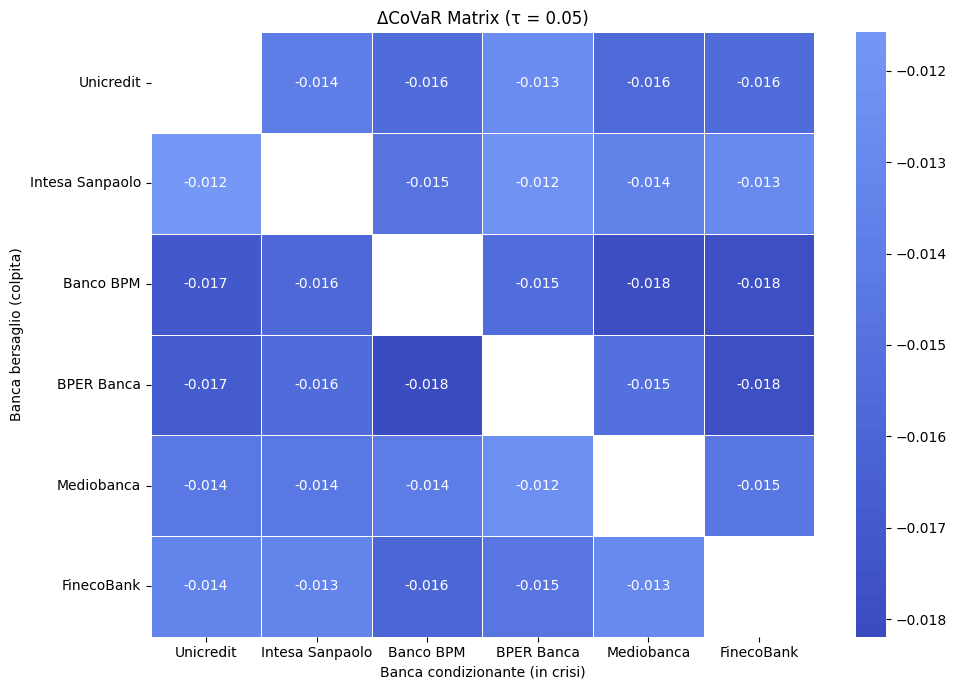

In [13]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from statsmodels.tools.sm_exceptions import IterationLimitWarning

# Config
tau = 0.05
banks = log_returns.columns.tolist()

# Inizializza matrice vuota
delta_covar_matrix = pd.DataFrame(index=banks, columns=banks)

# Silenzia warning da iterazioni quantile regression
warnings.simplefilter("ignore", IterationLimitWarning)

# Loop su tutte le coppie (i = target, j = conditioning)
for i in banks:
    for j in banks:
        if i == j:
            delta_covar_matrix.loc[i, j] = np.nan
            continue

        df = log_returns[[i, j]].dropna()
        df.columns = ['Y', 'X']  # target, conditioning

        try:
            # Calcolo VaR di X (banca condizionante)
            VaR_X = df['X'].quantile(tau)

            # Regressione quantile
            model = smf.quantreg('Y ~ X', data=df)
            res = model.fit(q=tau, max_iter=5000)

            # CoVaR: β₀ + β₁ * VaR_X
            beta_0 = res.params['Intercept']
            beta_1 = res.params['X']
            CoVaR = beta_0 + beta_1 * VaR_X

            # VaR normale della banca target
            VaR_Y = df['Y'].quantile(tau)

            # ΔCoVaR
            delta_covar = CoVaR - VaR_Y
            delta_covar_matrix.loc[i, j] = delta_covar

        except Exception as e:
            print(f"❌ Errore su {i} | {j}: {e}")
            delta_covar_matrix.loc[i, j] = np.nan

# Converti a float
delta_covar_matrix = delta_covar_matrix.astype(float)

plt.figure(figsize=(10, 7))
sns.heatmap(delta_covar_matrix, annot=True, fmt=".3f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("ΔCoVaR Matrix (τ = 0.05)")
plt.xlabel("Banca condizionante (in crisi)")
plt.ylabel("Banca bersaglio (colpita)")
plt.tight_layout()
plt.show()

In [14]:
systemic_ranking = delta_covar_matrix.sum(axis=0).sort_values(ascending=True)
print("\n🏆 RANKING SISTEMICITÀ (ΔCoVaR totali generati):")
print(systemic_ranking.round(4))


🏆 RANKING SISTEMICITÀ (ΔCoVaR totali generati):
Banco BPM         -0.0787
FinecoBank        -0.0786
Mediobanca        -0.0753
Unicredit         -0.0735
Intesa Sanpaolo   -0.0733
BPER Banca        -0.0673
dtype: float64


In [15]:
bank_data = {
    'Unicredit': {'market_cap': 44000, 'assets': 900000},
    'Intesa Sanpaolo': {'market_cap': 48000, 'assets': 1200000},
    'Banco BPM': {'market_cap': 6800, 'assets': 200000},
    'BPER Banca': {'market_cap': 5500, 'assets': 150000},
    'Mediobanca': {'market_cap': 8300, 'assets': 85000},
    'FinecoBank': {'market_cap': 7100, 'assets': 30000}
}

In [1]:
import yfinance as yf
market = yf.Ticker("EWI")  # oppure "^SX7E"
market_data = market.history(period="5y")['Close']
import numpy as np
market_logret = np.log(market_data / market_data.shift(1)).dropna()
# Rimuovi timezone da entrambi
log_returns.index = log_returns.index.tz_localize(None)
market_logret.index = market_logret.index.tz_localize(None)

NameError: name 'log_returns' is not defined

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# === Parametri SRISK ===
k = 0.08  # capitale minimo richiesto
bank_data = {
    'Unicredit': {'market_cap': 44000, 'assets': 900000},
    'Intesa Sanpaolo': {'market_cap': 48000, 'assets': 1200000},
    'Banco BPM': {'market_cap': 6800, 'assets': 200000},
    'BPER Banca': {'market_cap': 5500, 'assets': 150000},
    'Mediobanca': {'market_cap': 8300, 'assets': 85000},
    'FinecoBank': {'market_cap': 7100, 'assets': 30000}
}

# === Risultati
results = []

for bank in log_returns.columns:
    # Ensure both indices are timezone-naive for proper alignment
    log_returns_aligned = log_returns[bank].tz_localize(None) if log_returns[bank].index.tz is not None else log_returns[bank]
    market_logret_aligned = market_logret.tz_localize(None) if market_logret.index.tz is not None else market_logret

    # Find common dates between the two series
    common_dates = log_returns_aligned.index.intersection(market_logret_aligned.index)

    # Filter both series using the common dates
    y = log_returns_aligned.loc[common_dates].dropna()
    x = market_logret_aligned.loc[common_dates].dropna()

    # Check if there's enough data after alignment
    if len(y) == 0 or len(x) == 0:
        print(f"Skipping {bank} due to insufficient overlapping data after timezone alignment.")
        continue

    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    beta = model.params[1]

    # Calcolo LRMES
    lrmes = min(0.04 + 0.936 * beta, 1)  # proxy lineare usata in diversi articoli se mancano i dati granularilrmes = min(0.04 + 0.936 * beta, 1)  # proxy lineare usata in diversi articoli se mancano i dati granulari

    # Dati finanziari
    E = bank_data[bank]['market_cap']
    A = bank_data[bank]['assets']
    D = A - E

    # Calcolo SRISK
    srisk = max(0, k * D - (1 - lrmes) * E)

    results.append({
        'Banca': bank,
        'Beta': beta,
        'LRMES': lrmes,
        'SRISK': srisk
    })

# === Output ordinato per SRISK
df_srisk = pd.DataFrame(results).set_index('Banca').sort_values('SRISK', ascending=False)
print(df_srisk.round(4))

                   Beta   LRMES       SRISK
Banca                                      
Intesa Sanpaolo  0.8868  0.8701  85923.5341
Unicredit        1.0182  0.9930  68172.6077
Banco BPM        0.9063  0.8883  14696.6148
BPER Banca       1.0003  0.9762  11429.2942
Mediobanca       0.7257  0.7192   3805.7499
FinecoBank       0.8345  0.8210    561.4333


/tmp/ipython-input-2000305841.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
/tmp/ipython-input-2000305841.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
/tmp/ipython-input-2000305841.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
/tmp/ipython-input-2000305841.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a 

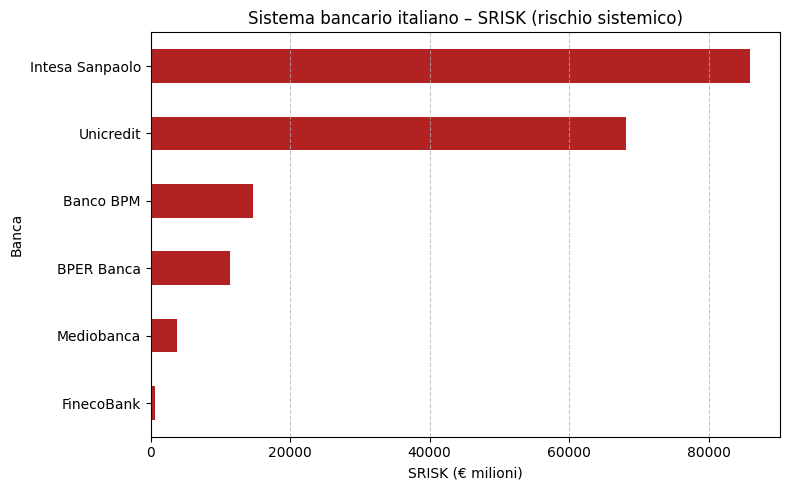

In [18]:
import matplotlib.pyplot as plt

df_srisk.sort_values('SRISK', ascending=True)['SRISK'].plot(
    kind='barh',
    color='firebrick',
    figsize=(8,5)
)
plt.xlabel("SRISK (€ milioni)")
plt.title("Sistema bancario italiano – SRISK (rischio sistemico)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Funzione per visualizzare il grafo dopo il fallimento di una banca
def generate_network_graph_after_failure(G, failed_bank, corr_matrix, banks):
    # Copia del grafo iniziale
    G_sim = G.copy()

    # Rimuovi la banca che fallisce
    G_sim.remove_node(failed_bank)

    # Posizione dei nodi nel layout
    pos = nx.spring_layout(G_sim, seed=42)

    # Generazione delle linee (edges) per il grafico
    edge_x = []
    edge_y = []
    for edge in G_sim.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_y.append(y0)
        edge_y.append(y1)

    # Posizioni dei nodi
    node_x = []
    node_y = []
    for node in G_sim.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)

    # Creazione del grafico
    fig = go.Figure()

    # Aggiungi gli archi (edges)
    fig.add_trace(go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='gray'),
        hoverinfo='none',
        mode='lines'
    ))

    # Aggiungi i nodi (nodes)
    fig.add_trace(go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(size=20, color='blue'),
        text=[node for node in G_sim.nodes()]
    ))

    fig.update_layout(title=f'Rete Interbancaria dopo il fallimento di {failed_bank}', showlegend=False, hovermode='closest')

    return fig

# Esempio di simulazione: fallo per una banca
failed_bank = "FinecoBank"
fig = generate_network_graph_after_failure(G, failed_bank, corr_matrix, banks)

# Mostra il grafico
fig.show()